# EDA 전 사전세팅

In [37]:
# EDA 사전 세팅
%matplotlib inline

import time
import os
os.environ['KMP_WARNINGS'] = 'off'
from functools import reduce
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다.
import seaborn as sns  #데이터 시각화 
sns.set(font="AppleGothic", 

        rc={"axes.unicode_minus":False},
        
        style='darkgrid')


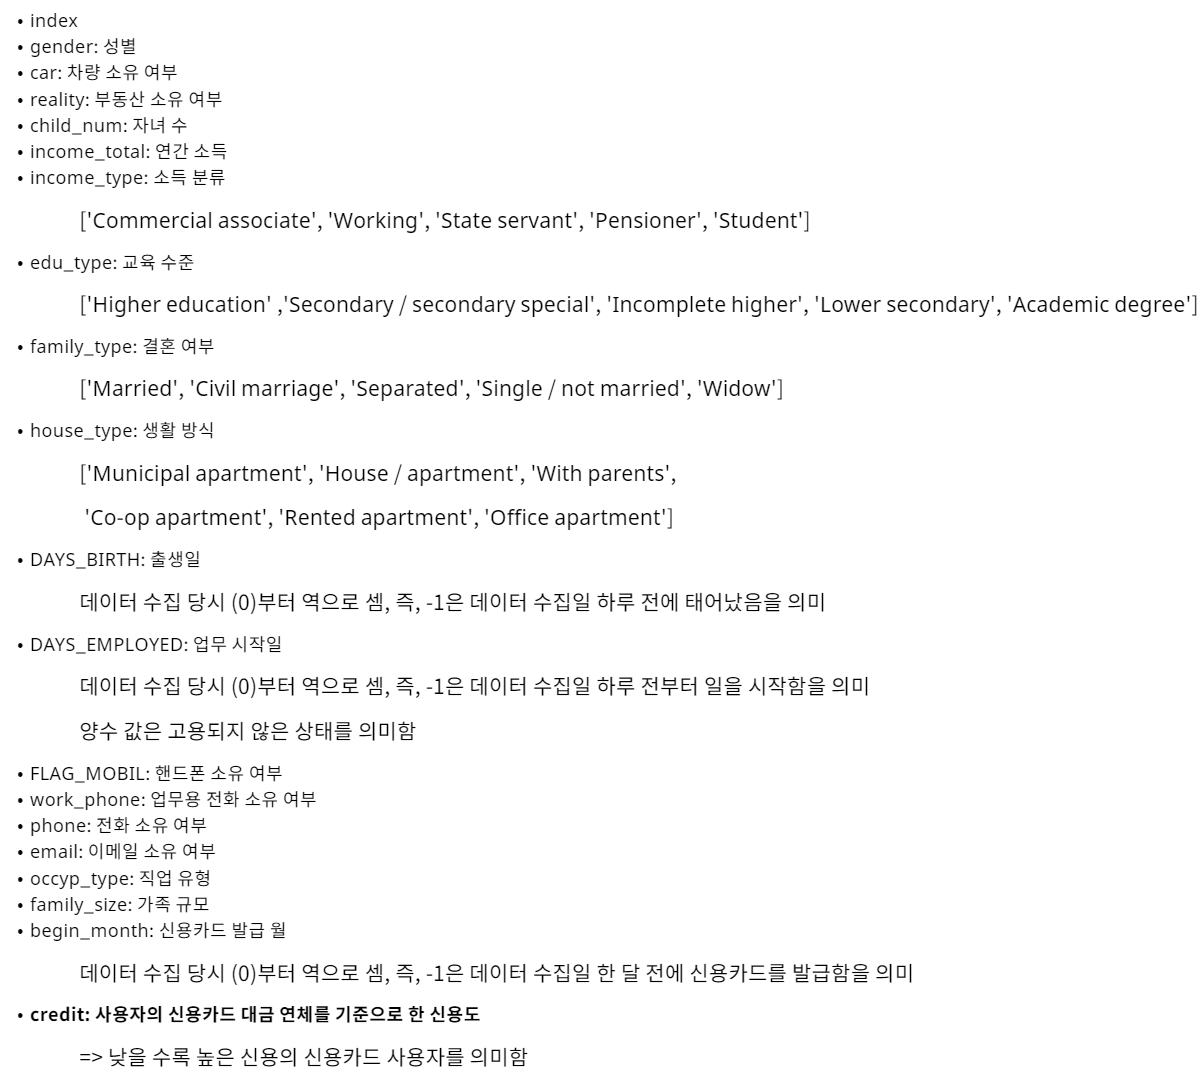

In [38]:
train = pd.read_csv('/Users/choejeehyuk/분석에 필요한 데이터/신용커드 예측 경진대회/train.csv')
test = pd.read_csv('/Users/choejeehyuk/분석에 필요한 데이터/신용커드 예측 경진대회/test.csv')
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


## 데이터 기본 정보

In [3]:
train.describe()
test.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,31456.50000,0.434700,1.850433e+05,-16020.466400,59776.690400,1.0,0.227600,0.296300,0.085600,2.202700,-26.272400
std,2886.89568,0.729102,1.015398e+05,4197.672887,138121.224504,0.0,0.419304,0.456648,0.279786,0.898272,16.348557
min,26457.00000,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,28956.75000,0.000000,1.215000e+05,-19483.250000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,31456.50000,0.000000,1.575000e+05,-15606.000000,-1577.000000,1.0,0.000000,0.000000,0.000000,2.000000,-25.000000
75%,33956.25000,1.000000,2.250000e+05,-12539.000000,-410.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,36456.00000,5.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,7.000000,0.000000


In [4]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

## 데이터 전처리

### 결측값 처리

In [5]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

### 파생변수 생성

In [39]:
def make_derivation(data):
    # 결측값 NaN 처리 및 고용되지 않은 사람 고용기간(단위: 일) 모두 0처리
    data = data.fillna('NAN')
    data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else abs(x))
    
    # 음수 데이터 양수로 변환 
    feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
    for feat in feats:
        data[feat]=np.abs(data[feat])
    
    # 가족 규모 8 이상 제거 및 인덱스 리셋
    data = data[(data['family_size'] <= 8)]
    data = data.reset_index(drop=True)
    
    # 파생변수 생성
    data['new_age'] = round(abs(data['DAYS_BIRTH'])/365.5,0).astype(np.int)
    data['year_os'] = data['DAYS_EMPLOYED']//365 # 근속연수
    data['month_os'] = data['DAYS_EMPLOYED']//30 # 근속월수
    data['month_ap'] = np.floor(data['DAYS_EMPLOYED']/30) - ((np.floor(data['DAYS_EMPLOYED']/30) / 12).astype('int') * 12) # 고용된 달 
    data['week_ap'] = np.floor(data['DAYS_EMPLOYED']/7) - ((np.floor(data['DAYS_EMPLOYED']/7) / 4).astype('int') * 4)
    data['aver_dep'] = data['income_total']/data['family_size'] 
    data['year_income'] = data['income_total'] // (data['year_os']) # 연봉
    data["family-child"] = data["family_size"] - data["child_num"]
    data.drop(['index'], axis=1, inplace = True)
    
    for i in range(len(data)):
        if data['family-child'][i] < 0:
            data['family-child'][i] == 0
    # year_income 변수에 inf가 몇개 있어서 모델링할 때 오류 발생 방지 차 처리
    data = data.replace([np.inf],0)
    
    #변수 형 변환 진행
    data['income_total'] = data['income_total'].astype(int)
    data.family_size= data.family_size.astype(int)
    data.begin_month= data.begin_month.astype(int)
    
    # 필요없다고 판단된 변수 제거
    data.drop(['FLAG_MOBIL','work_phone','phone', 'email'],axis=1,inplace=True)
    
    return data


In [40]:
train = make_derivation(train)
test = make_derivation(test)

In [6]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,occyp_type,family_size,begin_month,credit,new_age,year_os,month_os,month_ap,week_ap,aver_dep,year_income,family-child
0,F,N,N,0,202500,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,NAN,2,6,1.0,38,12,156,0.0,0.0,101250.0,16875.0,2.0
1,F,N,Y,1,247500,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,1540,Laborers,3,5,1.0,31,4,51,3.0,0.0,82500.0,61875.0,2.0
2,M,Y,Y,0,450000,Working,Higher education,Married,House / apartment,19087,4434,Managers,2,22,2.0,52,12,147,3.0,1.0,225000.0,37500.0,2.0
3,F,N,Y,0,202500,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,2092,Sales staff,2,37,0.0,41,5,69,9.0,2.0,101250.0,40500.0,2.0
4,F,Y,Y,0,157500,State servant,Higher education,Married,House / apartment,15037,2105,Managers,2,26,2.0,41,5,70,10.0,0.0,78750.0,31500.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26446,F,N,N,2,225000,State servant,Secondary / secondary special,Married,House / apartment,12079,1984,Core staff,4,2,1.0,33,5,66,6.0,3.0,56250.0,45000.0,2.0
26447,F,N,Y,1,180000,Working,Higher education,Separated,House / apartment,15291,2475,NAN,2,47,2.0,42,6,82,10.0,1.0,90000.0,30000.0,1.0
26448,F,Y,N,0,292500,Working,Secondary / secondary special,Civil marriage,With parents,10082,2015,Core staff,2,25,2.0,28,5,67,7.0,3.0,146250.0,58500.0,2.0
26449,M,N,Y,0,171000,Working,Incomplete higher,Single / not married,House / apartment,10145,107,Laborers,1,59,2.0,28,0,3,3.0,3.0,171000.0,0.0,1.0


In [65]:
train.head()
test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,occyp_type,family_size,begin_month,new_age,year_os,month_os,month_ap,week_ap,aver_dep,year_income,family-child
0,M,Y,N,0,112500,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,21990,0,NAN,2,60,60,0,0,0.0,0.0,56250.0,0.0,2.0
1,F,N,Y,0,135000,State servant,Higher education,Married,House / apartment,18964,8671,Core staff,2,36,52,23,289,1.0,2.0,67500.0,5869.0,2.0
2,F,N,Y,0,69372,Working,Secondary / secondary special,Married,House / apartment,15887,217,Laborers,2,40,43,0,7,7.0,3.0,34686.0,0.0,2.0
3,M,Y,N,0,112500,Commercial associate,Secondary / secondary special,Married,House / apartment,19270,2531,Drivers,2,41,53,6,84,0.0,1.0,56250.0,18750.0,2.0
4,F,Y,Y,0,225000,State servant,Higher education,Married,House / apartment,17822,9385,Managers,2,8,49,25,312,0.0,0.0,112500.0,9000.0,2.0


### EDA

In [11]:
def str_EDA(data):
  colors = sns.color_palette('icefire')
  for i in data.columns:
    if data[i].dtypes == 'object':
      group_data = data.groupby([i],as_index=False).count()
      
      plt.figure(figsize=(15,8))
      plt.subplot(1,2,1)
      sns.barplot(x=i,y='credit',data=group_data,palette=colors)
      plt.title('%s barplot'%i)
      plt.xticks(rotation=45)

      plt.subplot(1,2,2)
      plt.pie(group_data['credit']/100, labels=group_data[i], autopct='%.1f%%',colors=colors, startangle=90,counterclock=False)
      plt.title('%s pieplot'%i)
      plt.show()

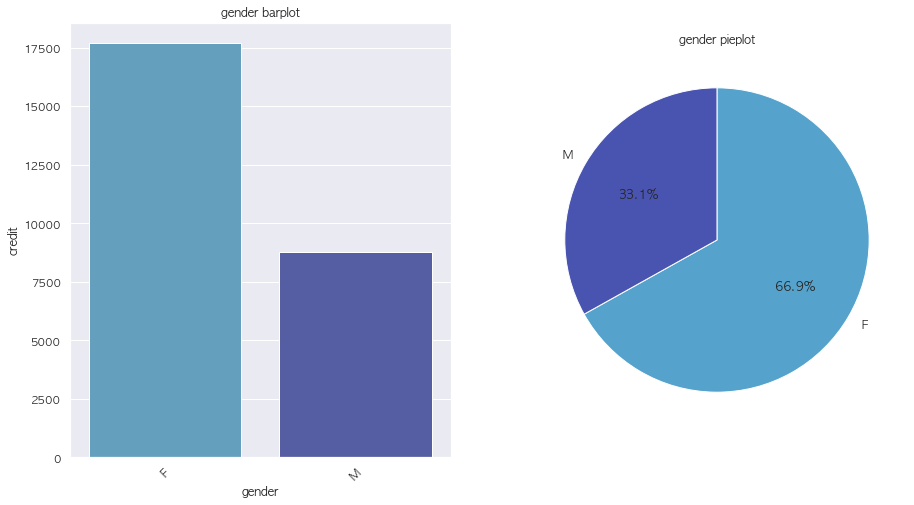

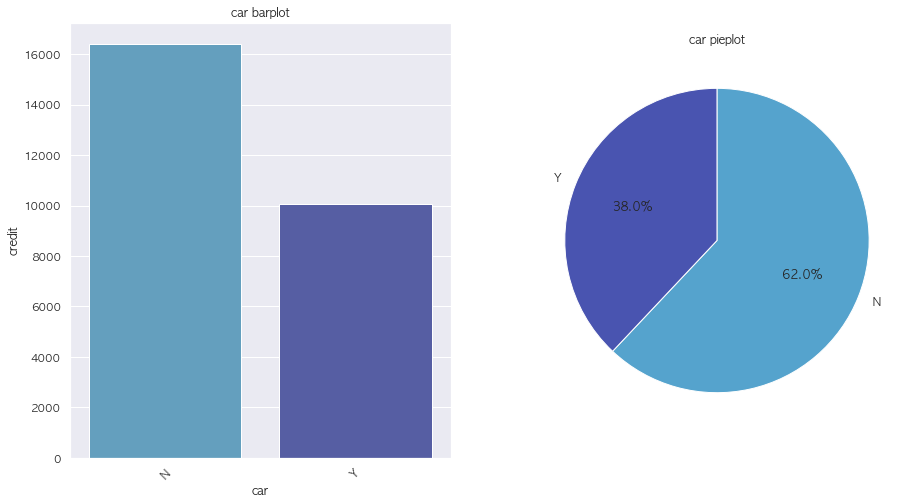

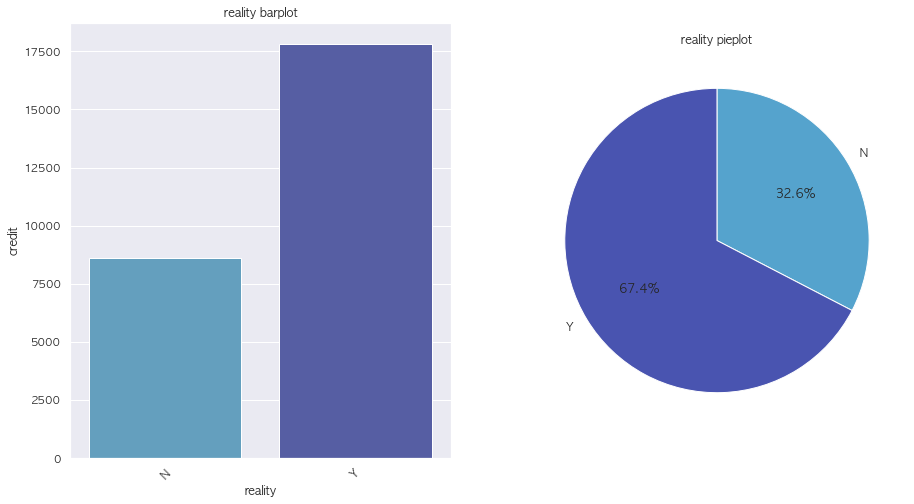

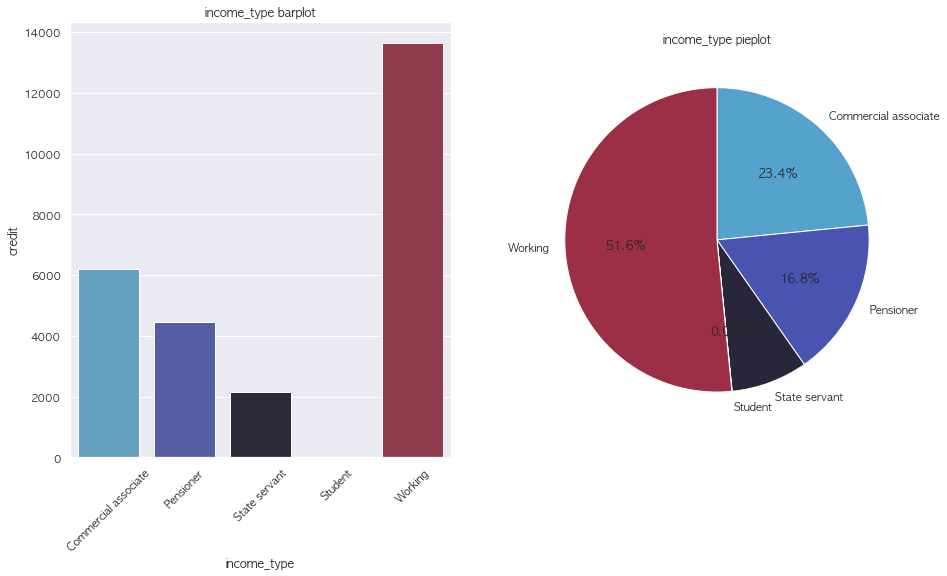

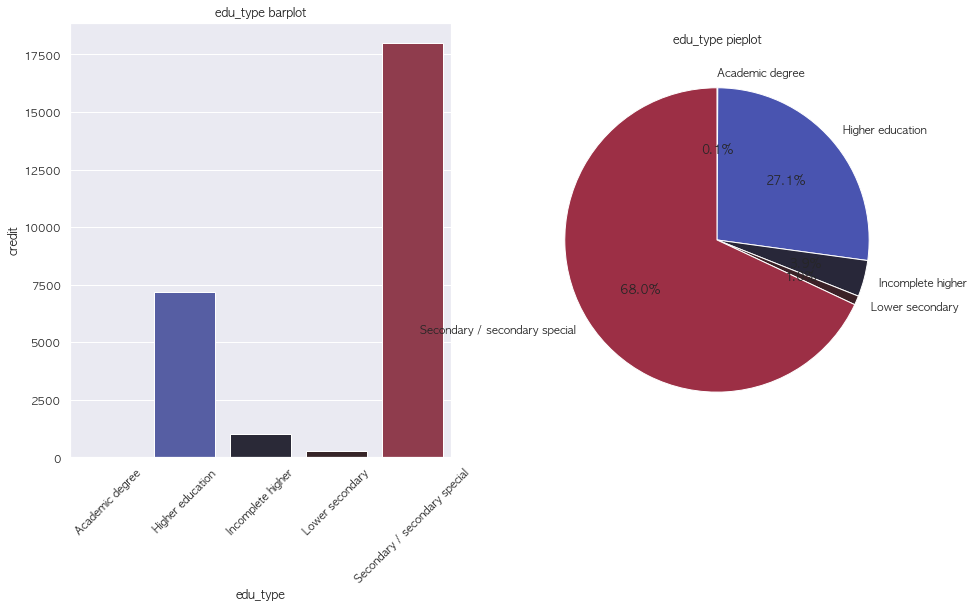

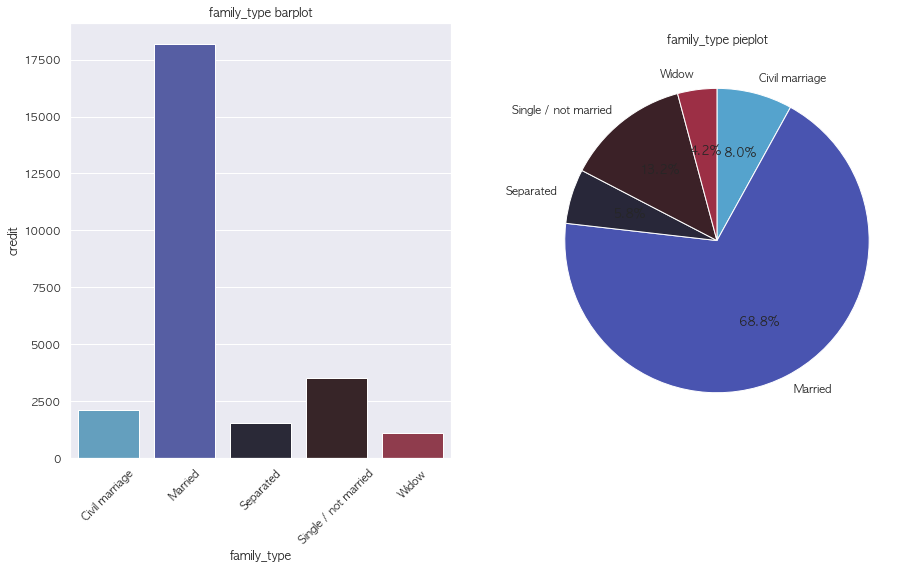

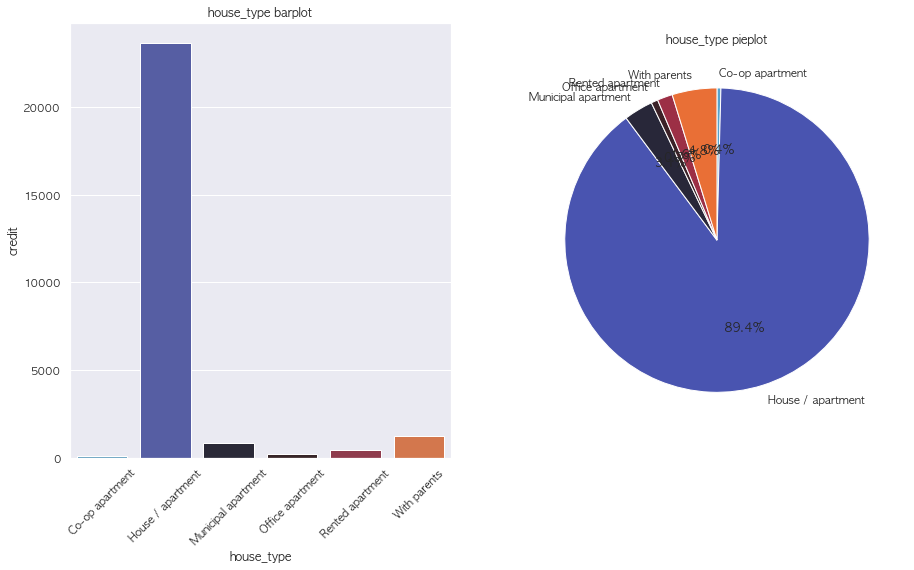

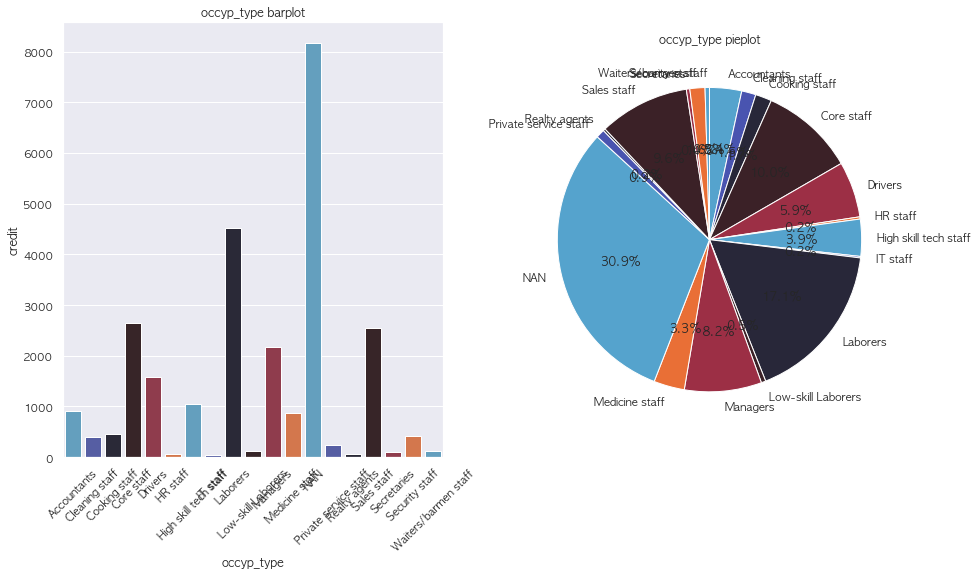

In [68]:
str_EDA(train)

In [39]:
def int_EDA(data):
    for i in data.columns:
        if data[i].dtypes != 'object':
            group_data = data.groupby([i],as_index=False).count()
      
            plt.figure(figsize=(15,8))
            plt.subplot(1,2,1)
            sns.histplot(data,x=data[i],bins=20, color="maroon")
            plt.title('%s histogram'%i)

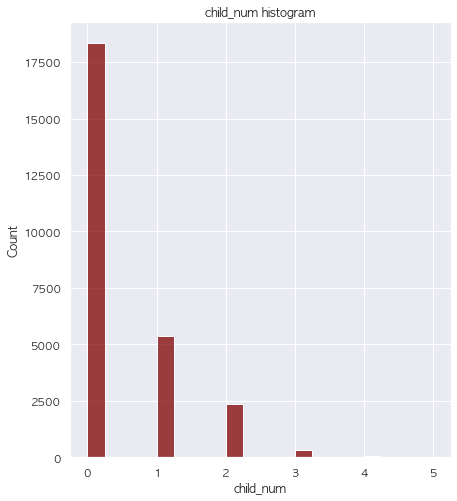

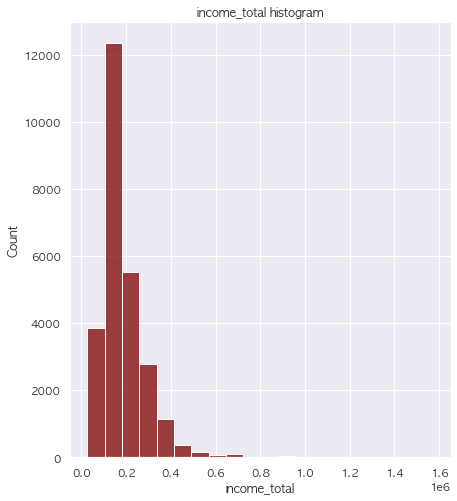

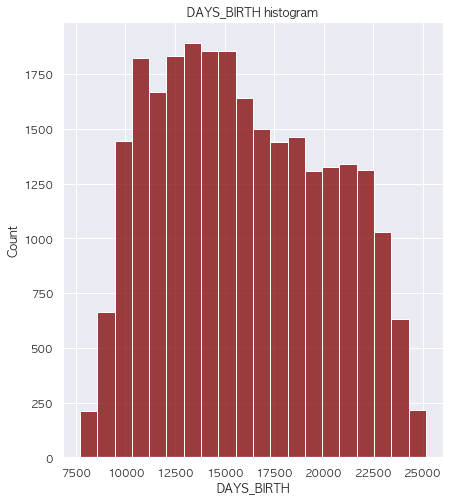

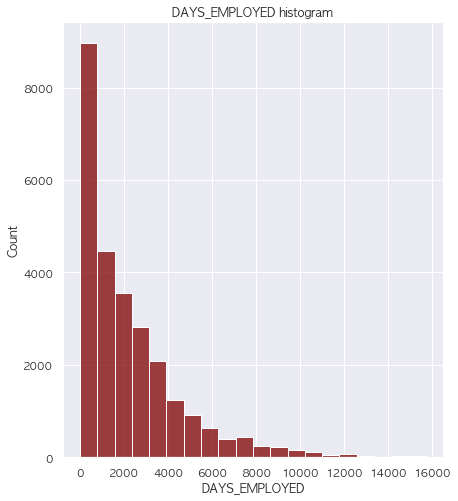

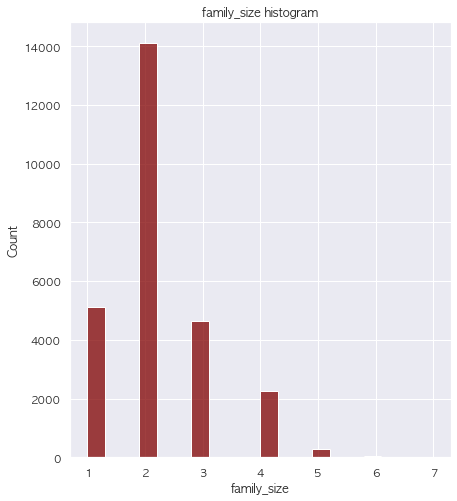

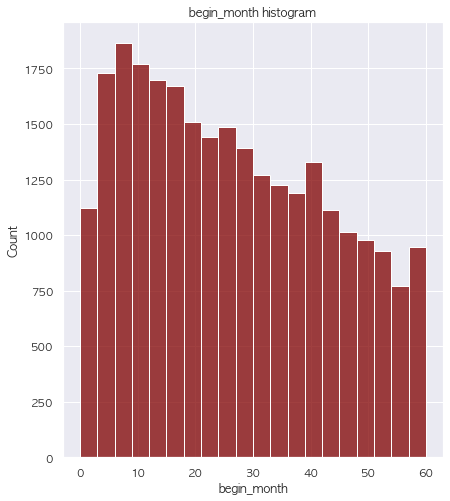

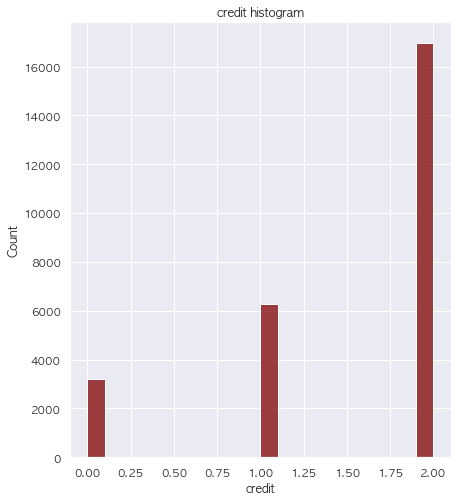

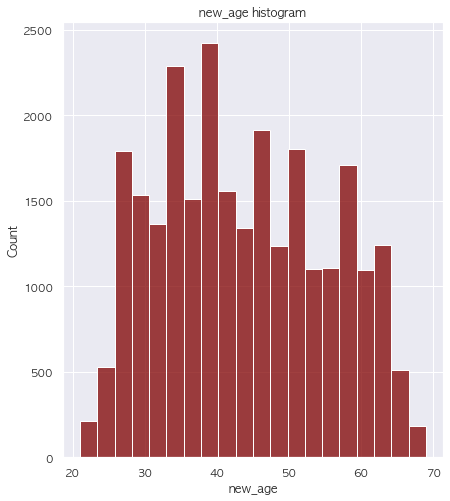

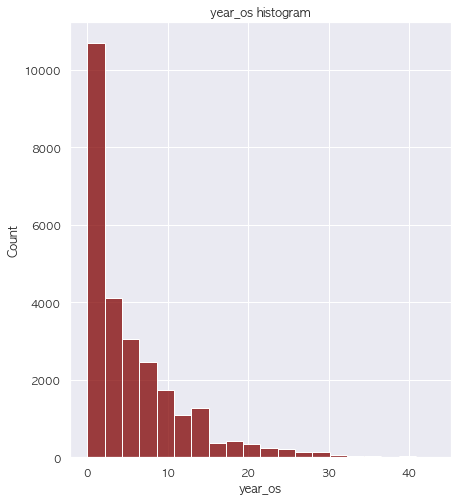

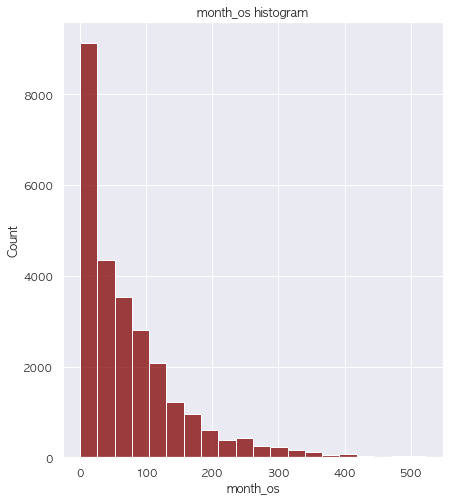

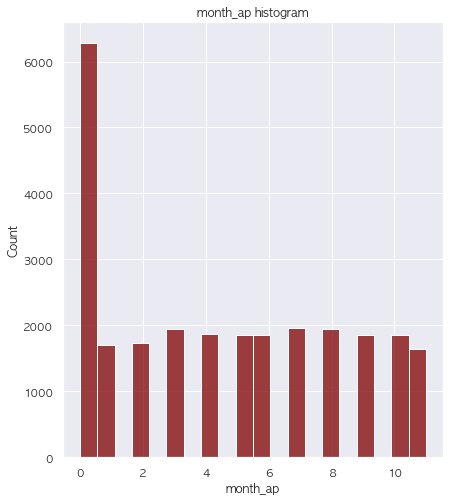

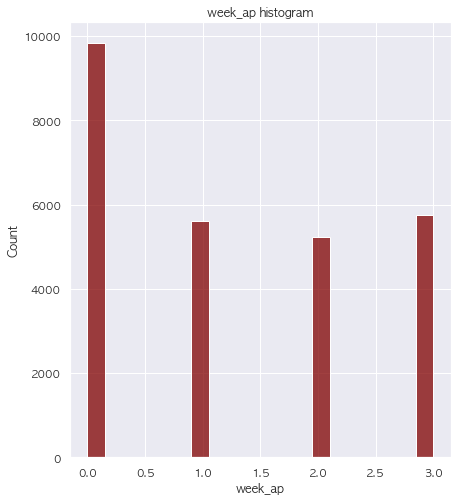

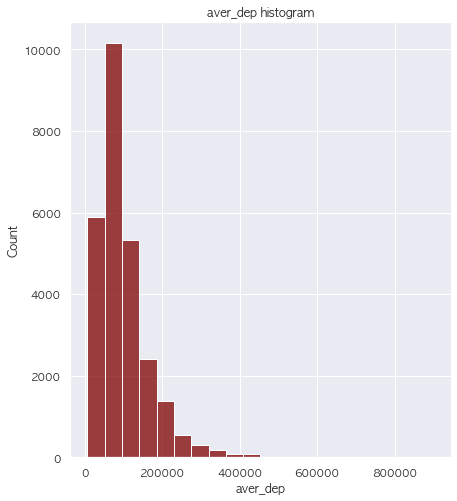

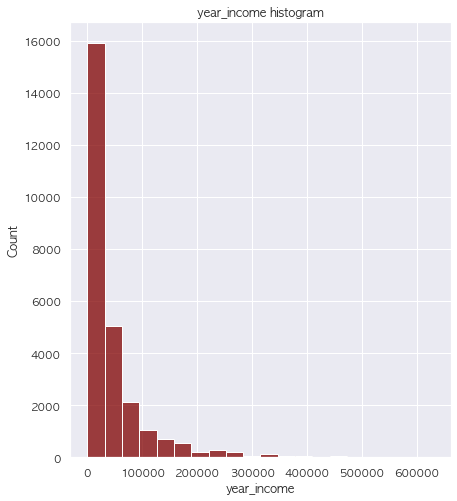

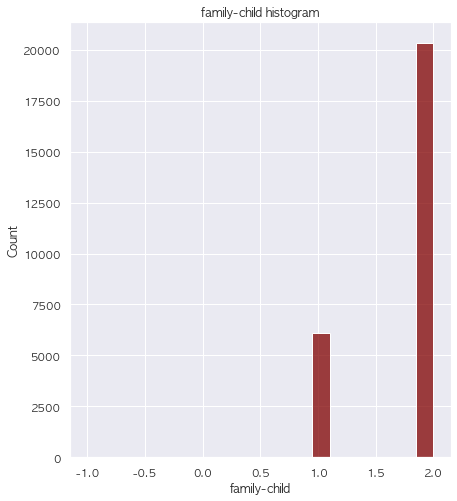

In [40]:
int_EDA(train)

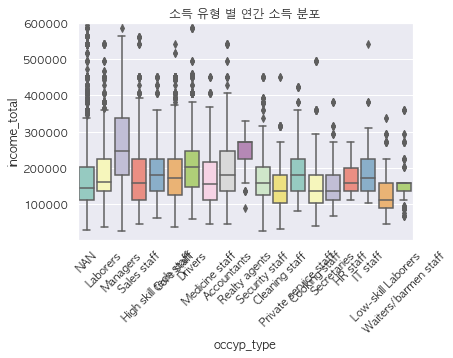

In [69]:
sns.boxplot(y='income_total',x='occyp_type',palette='Set3',data=train)
plt.xticks(rotation = 45)
plt.title('소득 유형 별 연간 소득 분포')
plt.ylim(1000, 600000)
plt.show()

## 데이터 변수 선택

### 범주형 변수 선택

In [41]:
def list_sep (data):
  cat_list = []
  int_list = []
  for i in data.columns:
    if data[i].dtypes == 'object':
      cat_list.append(i)
    else :
      int_list.append(i)

  return int_list, cat_list

In [42]:
int_list, cat_list = list_sep(train)
print('int : ',int_list)
print('cat : ',cat_list)

int :  ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month', 'credit', 'new_age', 'year_os', 'month_os', 'month_ap', 'week_ap', 'aver_dep', 'year_income', 'family-child']
cat :  ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']


# 유의성 검정을 이용한 범주형 변수 구히기

In [87]:
from scipy.stats import chi2_contingency

def cat_selection(data):
  #H0 : 독립변수의 범주형 변수(i)에 따른 종속변수 (credit)의 비율은 차이가 있다
  #H1 : 차이가 없다

  h0,h1,chi,c_list = [],[],[],[]

  for i in cat_list:
    chi_list = []
    cross_df = pd.crosstab(data[i],data['credit'],margins=False)
    result = chi2_contingency(observed=cross_df, correction=False)

    c_list.append(i)
    chi_list.append(result[0])
    chi_list.append(result[1])
    chi_list.append(result[2])
    chi.append(chi_list)

  chi_df = pd.DataFrame(columns=['chi_2','p-value','df'],data = chi)
  chi_df.index = c_list
  
  chi_df1 = chi_df[chi_df['p-value']<0.05]
  chi_df2= chi_df1[chi_df1['chi_2']>10]

  return chi_df, chi_df2

In [88]:
chi_df, chi_df_cat = cat_selection(train)

In [89]:
chi_df

,chi_2,p-value,df
gender,0.742683,6.898085e-01,2
car,9.366187,9.250354e-03,2
reality,11.230277,3.642304e-03,2
income_type,23.800389,2.475172e-03,8
edu_type,8.886748,3.519398e-01,8
family_type,46.383397,2.009568e-07,8
house_type,37.725432,4.236293e-05,10
occyp_type,90.398801,1.422022e-06,36


In [90]:
chi_df_cat

,chi_2,p-value,df
reality,11.230277,3.642304e-03,2
income_type,23.800389,2.475172e-03,8
family_type,46.383397,2.009568e-07,8
house_type,37.725432,4.236293e-05,10
occyp_type,90.398801,1.422022e-06,36


In [91]:
list(chi_df_cat.index)

['reality', 'income_type', 'family_type', 'house_type', 'occyp_type']

# VIF를 이용한 수치형 변수 제거 (다중공선성 처리)

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # 분신팽창요인 VIF구하는 클래스 호출

def feature_engineering_XbyVIF(int_train): # VIF 산출하는 함수 작성
    vif = pd.DataFrame() # VIF 값을 담을 데이터 프레임 생성
    vif['VIF_Factor'] = [variance_inflation_factor(int_train.values, i) #VIF 값 산출
                         for i in range(int_train.shape[1])] # 변수 이름
    vif['Feature'] = int_train.columns 
    return vif
int_train = train[int_list]
feature_engineering_XbyVIF(int_train)

,VIF_Factor,Feature
0,inf,child_num
1,5.236266e+00,income_total
2,1.548733e+03,DAYS_BIRTH
3,7.974815e+04,DAYS_EMPLOYED
4,inf,family_size
5,1.016587e+00,begin_month
6,1.004260e+00,credit
7,1.541126e+03,new_age
8,7.852596e+02,year_os
9,6.893345e+04,month_os


In [93]:
def vif(x):
    # vif 10 초과시 drop을 위한 임계값 설정
    thresh = 10
    # Filter method로 feature selection 진행 후 최종 도출 될 데이터 프레임 형성
    output = pd.DataFrame()
    # 데이터의 컬럼 개수 설정
    k = x.shape[1]
    # VIF 측정
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    for i in range(1,k):
        print(f'{i}번째 VIF 측정')
        # VIF 최대 값 선정
        a = np.argmax(vif) # np.argmax -> 가장 큰 값이 있는 인덱스 값을 반환하는 메서드
        print(f'Max VIF feature & value : {x.columns[a]}, {vif[a]}')
        # VIF 최대 값이 임계치를 넘지 않는 경우 break
        if (vif[a] <= thresh):
            print('\n')
            for q in range(output.shape[1]):
                print(f'{output.columns[q]}의 vif는 {np.round(vif[q],2)}입니다.')
            break
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        if (i == 1):
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        elif (i > 1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return (output)

In [94]:
int_select = vif(int_train)

1번째 VIF 측정
Max VIF feature & value : child_num, inf
2번째 VIF 측정
Max VIF feature & value : year_os, 81168.81864951388
3번째 VIF 측정
Max VIF feature & value : income_total, 1552.4599278553255
4번째 VIF 측정
Max VIF feature & value : income_total, 793.8809635307055
5번째 VIF 측정
Max VIF feature & value : year_os, 7.552306822424143


income_total의 vif는 5.23입니다.
family_size의 vif는 2.8입니다.
begin_month의 vif는 1.02입니다.
credit의 vif는 1.0입니다.
new_age의 vif는 1.43입니다.
year_os의 vif는 1.2입니다.
month_ap의 vif는 1.21입니다.
week_ap의 vif는 1.17입니다.
aver_dep의 vif는 7.55입니다.
year_income의 vif는 1.4입니다.
family-child의 vif는 2.32입니다.


## 총합 변수 선택

###  이렇게 유의성 검정과 VIF 필터 메서드를 이용해 변수를 솎아냈으나 변수를 골라내지 않은 기존 데이터를 이용한 모델링이 성능이 더 좋음<br> 따라서, 밑에 모델링 진행할때는 make_derivation함수만 적용한 상태로 인코딩 및 스케일링과 오버샘플링 하여 진행함

In [95]:
cat_int_selec = list(chi_df_cat.index) + list(int_select.columns)
cat_int_selec

['reality',
 'income_type',
 'family_type',
 'house_type',
 'occyp_type',
 'income_total',
 'family_size',
 'begin_month',
 'credit',
 'new_age',
 'year_os',
 'month_ap',
 'week_ap',
 'aver_dep',
 'year_income',
 'family-child']

### 총합 변수 선택

In [203]:
#for i in cat_selec:
 # train[i] = train[i].astype('object')

## 최종 데이터 셋 구성
+ 변수 선택을 통해 적합한 칼럼만 분석에 사용

In [96]:
df_train = train[cat_int_selec]
df_train

,reality,income_type,family_type,house_type,occyp_type,income_total,family_size,begin_month,credit,new_age,year_os,month_ap,week_ap,aver_dep,year_income,family-child
0,0,0,1,2,12,0.149115,-0.216262,-1.215242,1.0,-0.492903,0.994253,-1.230046,-1.077087,0.002062,-0.414275,0.548245
1,1,0,0,1,8,0.590785,0.897294,-1.275633,1.0,-1.101276,-0.250471,-0.424295,-1.077087,-0.254157,0.298249,0.548245
2,1,4,1,1,10,2.578304,-0.216262,-0.248981,2.0,0.723843,0.994253,-0.424295,-0.223607,1.693108,-0.087702,0.548245
3,1,0,1,1,15,0.149115,-0.216262,0.656889,0.0,-0.232172,-0.094880,1.187206,0.629874,0.002062,-0.040200,0.548245
4,1,2,1,1,10,-0.292556,-0.216262,-0.007416,2.0,-0.232172,-0.094880,1.455790,-1.077087,-0.305401,-0.182705,0.548245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26446,0,2,1,1,3,0.369950,2.010849,-1.456807,1.0,-0.927455,-0.094880,0.381456,1.483355,-0.612864,0.031052,0.548245
26447,1,4,2,1,12,-0.071721,-0.216262,1.260802,2.0,-0.145261,0.060710,1.455790,-0.223607,-0.151670,-0.206456,-1.817824
26448,0,4,0,5,3,1.032456,-0.216262,-0.067807,2.0,-1.362007,-0.094880,0.650039,1.483355,0.616988,0.244809,0.548245
26449,1,4,3,1,8,-0.160055,-1.329817,1.985497,2.0,-1.362007,-0.872832,-0.424295,1.483355,0.955197,-0.681472,-1.817824


In [ ]:
#df_train.to_csv('/content/drive/MyDrive/신용카드/df_train.csv',index=False)

## 모델링 전처리

In [43]:

# 모델링
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from skopt import BayesSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_absolute_error


from xgboost import plot_importance

### train test split

### 인코딩 : OrdinalEncoder

In [44]:
train_int, train_cat = list_sep(train)
print('train_cat : ',train_cat)
print('train_int : ',train_int)

train_cat :  ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']
train_int :  ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month', 'credit', 'new_age', 'year_os', 'month_os', 'month_ap', 'week_ap', 'aver_dep', 'year_income', 'family-child']


In [45]:
Encoder = LabelEncoder()
for i in cat_list:
    train[i] = Encoder.fit_transform(train[i].astype(str))
    test[i] = Encoder.transform(test[i].astype(str))

### 스케일링 : StandardScaler
+ 분류에 유용

In [46]:
from sklearn.preprocessing import StandardScaler
tilist =['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month', 'new_age', 'year_os', 'month_os', 'month_ap', 'week_ap', 'aver_dep', 'year_income', 'family-child']
Scaler = StandardScaler()

train[tilist] = Scaler.fit_transform(train[tilist])
test[tilist] = Scaler.transform(test[tilist])

### 오버 샘플링 : SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
# r_train = train.copy()
target = train['credit'].values
smote = SMOTE(random_state=23)
train , target= smote.fit_resample(train, target)
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,occyp_type,family_size,begin_month,credit,new_age,year_os,month_os,month_ap,week_ap,aver_dep,year_income,family-child
0,0,0,0,-0.589850,0.149115,0,1,1,2,-0.490076,1.059065,12,-0.216262,-1.215242,1.0,-0.492903,0.994253,1.052910,-1.230046,-1.077087,0.002062,-0.414275,0.548245
1,0,0,1,0.795036,0.590785,0,4,0,1,-1.089581,-0.277867,8,0.897294,-1.275633,1.0,-1.101276,-0.250471,-0.277235,-0.424295,-1.077087,-0.254157,0.298249,0.548245
2,1,1,1,-0.589850,2.578304,4,1,1,1,0.744635,0.943049,10,-0.216262,-0.248981,2.0,0.723843,0.994253,0.938898,-0.424295,-0.223607,1.693108,-0.087702,0.548245
3,0,0,1,-0.589850,0.149115,0,4,1,1,-0.207101,-0.044990,15,-0.216262,0.656889,0.0,-0.232172,-0.094880,-0.049211,1.187206,0.629874,0.002062,-0.040200,0.548245
4,0,1,1,-0.589850,-0.292556,2,1,1,1,-0.219239,-0.039505,10,-0.216262,-0.007416,2.0,-0.232172,-0.094880,-0.036542,1.455790,-1.077087,-0.305401,-0.182705,0.548245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50881,0,0,1,1.649330,-0.207947,2,4,1,1,-0.607197,-0.529196,10,1.584213,-1.145828,1.0,-0.587144,-0.561651,-0.525743,0.752942,-0.223607,-0.735480,0.633693,0.548245
50882,1,1,1,-0.589850,1.694962,4,4,1,1,0.309107,0.437639,4,-0.216262,-1.085443,1.0,0.289291,0.371891,0.432175,1.724374,0.629874,1.078182,0.031052,0.548245
50883,0,1,1,-0.589850,0.590785,4,4,1,1,-0.009329,-0.039927,12,-0.216262,-1.419279,1.0,0.028559,-0.094880,-0.036542,1.455790,-1.077087,0.309525,0.102305,0.548245
50884,0,0,1,-0.589850,0.388727,4,4,2,1,-0.231345,-0.757236,12,-1.329817,-1.463281,1.0,-0.213697,-0.717242,-0.759160,-0.972881,-0.223607,1.719251,2.911440,-1.817824


In [47]:
print(len(train[train['credit'] == 2.0]))
print(len(train[train['credit'] == 1.0]))
print(len(train[train['credit'] == 0.0]))

16962
6267
3222


In [48]:
## feature_set 저장
feat_train = train.drop('credit', axis=1).values
target = train['credit'].values
feat_test = test.values
n_class = 3

## 모델링

In [49]:
X_train , X_valid , y_train , y_valid = train_test_split(feat_train , target , test_size=0.2)

In [50]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

## Run all model Non Hyperparameter Optimization 

In [51]:
def modeling(X_train , X_valid , y_train , y_valid):
    start_time = time.time()
    
    print('모델링 시작...............')
    print('----------------------------------------LGBMClassifier--------------------------------------------')
    lgbm = LGBMClassifier(n_estimators=400, learning_rate= 0.05)
    lgbm.fit(X_train,y_train,eval_metric='logloss')
    y_pred = lgbm.predict(X_valid)
    y_pred_proba = lgbm.predict_proba(X_valid)
    print(confusion_matrix(y_valid, y_pred), round(accuracy_score(y_valid, y_pred) * 100, 2), log_loss(y_valid, y_pred_proba))
    
    print('----------------------------------------XGBClassifier---------------------------------------------')
    xgb = XGBClassifier(n_estimators=400, learning_rate= 0.05)
    xgb.fit(X_train,y_train)
    y_pred = xgb.predict(X_valid)
    y_pred_proba = xgb.predict_proba(X_valid)
    print(confusion_matrix(y_valid, y_pred), round(accuracy_score(y_valid, y_pred) * 100, 2), log_loss(y_valid, y_pred_proba))
    
    print('----------------------------------------GradientBoostingClassifier--------------------------------')
    gbc = GradientBoostingClassifier(n_estimators=400,learning_rate=0.05)
    gbc.fit(X_train,y_train)
    y_pred = gbc.predict(X_valid)
    y_pred_proba = gbc.predict_proba(X_valid)
    print(confusion_matrix(y_valid, y_pred), round(accuracy_score(y_valid, y_pred) * 100, 2), log_loss(y_valid, y_pred_proba))
    
    print('----------------------------------------RandomForestClassifier------------------------------------')
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_valid)
    y_pred_proba = rfc.predict_proba(X_valid)
    print(confusion_matrix(y_valid, y_pred), round(accuracy_score(y_valid, y_pred) * 100, 2), log_loss(y_valid, y_pred_proba))
    
    print('----------------------------------------CatBoostClassifier----------------------------------------')
    catb = CatBoostClassifier(verbose=0)
    catb.fit(X_train, y_train, verbose=0)
    y_pred = catb.predict(X_valid)
    y_pred_proba = catb.predict_proba(X_valid)
    print(confusion_matrix(y_valid, y_pred), round(accuracy_score(y_valid, y_pred) * 100, 2), log_loss(y_valid, y_pred_proba))
    
    end_time = time.time()
    print("Model execution time: {:.2f}s".format(end_time - start_time))
    
modeling(X_train , X_valid , y_train , y_valid)

모델링 시작...............
----------------------------------------LGBMClassifier--------------------------------------------
[[  61   72  477]
 [  20  409  849]
 [  24   98 3281]] 70.89 0.7301454199457817
----------------------------------------XGBClassifier---------------------------------------------
[18:15:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[  26   60  524]
 [  16  361  901]
 [  12   58 3333]] 70.31 0.7444729107898345
----------------------------------------GradientBoostingClassifier--------------------------------
[[   4   70  536]
 [   4  311  963]
 [   1   34 3368]] 69.61 0.7773665808257479
----------------------------------------RandomForestClassifier------------------------------------
[[ 179  102  329]
 [  73

## LGBMClassifier() Hyperparameter Optimization with StratifiedKFold

In [52]:
n_fold = 16
cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=40)

print(feat_train.shape)

lgb_p_val = np.zeros((feat_train.shape[0], n_class))
lgb_p_tst = np.zeros((feat_test.shape[0], n_class))
for i, (i_trn, i_val) in enumerate(cv.split(feat_train, target), 1):
    print(f'training model for CV #{i}')
    lgb_clf = LGBMClassifier(max_depth=24,
                       num_leaves=110,
                       colsample_bytree=0.3,
                       n_estimators=230, 
                       min_child_samples=2,
                       subsample=0.9,
                       subsample_freq=2,
                       learning_rate=0.09,
                       random_state=2021,
                       verbose = 0)

    lgb_clf.fit(feat_train[i_trn], target[i_trn],
            eval_set=[(feat_train[i_val], target[i_val])], verbose = 0)

    lgb_p_val[i_val, :] = lgb_clf.predict_proba(feat_train[i_val])
    lgb_p_tst += lgb_clf.predict_proba(feat_test) / n_fold
    
print(f'{log_loss(target, lgb_p_val)}')
print(f'{confusion_matrix(target, np.argmax(lgb_p_val, axis=1))}%')

(26451, 22)
training model for CV #1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
training model for CV #2
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
training model for CV #3
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002760 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
training model for CV #4
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can

In [53]:
print(f'{log_loss(target, lgb_p_val)}')

0.6939597867059928


In [34]:
sub = pd.read_csv('/Users/choejeehyuk/분석에 필요한 데이터/신용커드 예측 경진대회/sample_submission.csv')

In [35]:
sub.iloc[:, 1:] = lgb_p_tst
sub

,index,0,1,2
0,26457,0.037569,0.155094,0.807337
1,26458,0.270517,0.304851,0.424632
2,26459,0.067098,0.071560,0.861342
3,26460,0.242560,0.104631,0.652810
4,26461,0.062955,0.147843,0.789203
...,...,...,...,...
9995,36452,0.078758,0.311777,0.609465
9996,36453,0.275317,0.226747,0.497936
9997,36454,0.030796,0.184177,0.785027
9998,36455,0.089166,0.361363,0.549472


In [36]:
strtime = time.strftime("%Y%m%d-%H%M%S")
sub.to_csv(f"{strtime}_lgbm_hyperop_smote_nfold_{17}_submission.csv", index=False)